In [186]:
# import numpy as np

# class SVM:
#     def __init__(self, C=1.0, tol=1e-3, max_passes=5, kernel_type='linear', sigma=0.1):
#         self.C = C
#         self.tol = tol
#         self.max_passes = max_passes
#         self.kernel_type = kernel_type
#         self.sigma = sigma
#         self.alphas = None
#         self.b = None

#     def _linear_kernel(self, x1, x2):
#         return np.dot(x1, x2)

#     def _rbf_kernel(self, x1, x2):
#         return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * (self.sigma ** 2)))

#     def _kernel_function(self, x1, x2):
#         if self.kernel_type == 'linear':
#             return self._linear_kernel(x1, x2)
#         elif self.kernel_type == 'rbf':
#             return self._rbf_kernel(x1, x2)
#         else:
#             raise ValueError("Unsupported kernel type")

#     def _objective_function(self, X, y, alphas):
#         return np.sum(alphas) - 0.5 * np.sum((alphas * y).dot(X).dot(X.T).dot((alphas * y).T))

#     def _decision_function(self, X, y, alphas, b, x):
#         return np.sum(alphas * y * self._kernel_function(X, x)) + b

#     def fit(self, X, y):
#         n_samples, n_features = X.shape
#         self.alphas = np.zeros(n_samples)
#         self.b = 0
#         passes = 0

#         while passes < self.max_passes:
#             num_changed_alphas = 0
#             for i in range(n_samples):
#                 Ei = self._decision_function(X, y, self.alphas, self.b, X[i]) - y[i]
#                 if (y[i] * Ei < -self.tol and self.alphas[i] < self.C) or (y[i] * Ei > self.tol and self.alphas[i] > 0):
#                     j = np.random.choice(np.delete(np.arange(n_samples), i))
#                     Ej = self._decision_function(X, y, self.alphas, self.b, X[j]) - y[j]

#                     alpha_i_old = self.alphas[i]
#                     alpha_j_old = self.alphas[j]

#                     if y[i] != y[j]:
#                         L = max(0, self.alphas[j] - self.alphas[i])
#                         H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
#                     else:
#                         L = max(0, self.alphas[j] + self.alphas[i] - self.C)
#                         H = min(self.C, self.alphas[j] + self.alphas[i])

#                     if L == H:
#                         continue

#                     eta = 2 * self._kernel_function(X[i], X[j]) - self._kernel_function(X[i], X[i]) - self._kernel_function(X[j], X[j])
#                     if eta >= 0:
#                         continue

#                     self.alphas[j] -= y[j] * (Ei - Ej) / eta
#                     self.alphas[j] = min(H, max(L, self.alphas[j]))

#                     if np.abs(self.alphas[j] - alpha_j_old) < self.tol:
#                         self.alphas[j] = alpha_j_old
#                         continue

#                     self.alphas[i] += y[i] * y[j] * (alpha_j_old - self.alphas[j])

#                     b1 = self.b - Ei - y[i] * (self.alphas[i] - alpha_i_old) * self._kernel_function(X[i], X[i]) - y[j] * (self.alphas[j] - alpha_j_old) * self._kernel_function(X[i], X[j])
#                     b2 = self.b - Ej - y[i] * (self.alphas[i] - alpha_i_old) * self._kernel_function(X[i], X[j]) - y[j] * (self.alphas[j] - alpha_j_old) * self._kernel_function(X[j], X[j])

#                     if 0 < self.alphas[i] < self.C:
#                         self.b = b1
#                     elif 0 < self.alphas[j] < self.C:
#                         self.b = b2
#                     else:
#                         self.b = (b1 + b2) / 2

#                     num_changed_alphas += 1

#             if num_changed_alphas == 0:
#                 passes += 1
#             else:
#                 passes = 0

#         return self

#     def predict(self, X,y):
#         if self.alphas is None or self.b is None:
#             raise ValueError("Model not trained yet")

#         n_samples = X.shape[0]
#         y_pred = np.zeros(n_samples)

#         for i in range(n_samples):
#             y_pred[i] = np.sign(self._decision_function(X, y, self.alphas, self.b, X[i]))

#         return y_pred


In [187]:
# data = pd.read_csv("dataset_1.csv")
# X = data[['speed', 'price']].values
# y = data['Model'].values

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Encode labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Define a function to convert labels
# def convert_labels(y, class_label):
#     return np.where(y == class_label, 1, -1)

# # Fit SVM model for each class
# svm_models = []
# for class_label in np.unique(y_encoded):
#     y_binary = convert_labels(y_encoded, class_label)
#     svm = SVM(kernel_type='linear')
#     svm.fit(X_scaled, y_binary)
#     svm_models.append(svm)

# # Predictions
# predictions = []
# for i,c in enumerate(np.unique(y_encoded)):
#     y_binary = convert_labels(y_encoded, class_label)
#     predictions.append(svm_models[i].predict(X_scaled,y_binary))

# # Combine predictions
# final_predictions = np.argmax(predictions, axis=0)
# print("Predictions:", len(predictions))

In [188]:
# from sklearn.metrics import accuracy_score

# svm_models_linear = []
# for class_label in np.unique(y_encoded):
#     y_binary = convert_labels(y_encoded, class_label)
#     svm = SVM(kernel_type='linear')
#     svm.fit(X_scaled, y_binary)
#     svm_models_linear.append(svm)

# # Fit SVM model for each class with RBF kernel
# svm_models_rbf = []
# for class_label in np.unique(y_encoded):
#     y_binary = convert_labels(y_encoded, class_label)
#     svm = SVM(kernel_type='rbf')
#     svm.fit(X_scaled, y_binary)
#     svm_models_rbf.append(svm)

# # Predictions for linear kernel SVM
# predictions_linear = []
# for i,c in enumerate(np.unique(y_encoded)):
#     y_binary = convert_labels(y_encoded, class_label)
#     predictions_linear.append(svm_models_linear[i].predict(X_scaled,y_binary))


# # Predictions for RBF kernel SVM
# predictions_rbf = []
# for i,c in enumerate(np.unique(y_encoded)):
#     y_binary = convert_labels(y_encoded, class_label)
#     predictions_rbf.append(svm_models_rbf[i].predict(X_scaled,y_binary))

# accuracy_linears = []
# for i,c in enumerate(np.unique(y_encoded)):
#     y_binary = convert_labels(y_encoded, class_label) 
#     accuracy_linear = accuracy_score(y_binary, predictions_linear[i])
#     accuracy_linears.append(accuracy_linear)

# print(np.mean(accuracy_linears))

# accuracy_rbfs = []
# for i,c in enumerate(np.unique(y_encoded)):
#     y_binary = convert_labels(y_encoded, class_label) 
#     accuracy_rbf = accuracy_score(y_binary, predictions_rbf[i])
#     accuracy_rbfs.append(accuracy_rbf)

# print(np.mean(accuracy_rbfs))
# # print(len(predictions_linear[0]))

# # print(predictions_rbf)
# # Combine predictions for linear kernel SVM
# # final_predictions_linear = np.argmax(predictions_linear, axis=0)

# # # Combine predictions for RBF kernel SVM
# # final_predictions_rbf = np.argmax(predictions_rbf, axis=0)

# # # Compare results
# # print("Predictions (Linear Kernel):", final_predictions_linear)
# # print("Predictions (RBF Kernel):", final_predictions_rbf)

In [189]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# def plot_decision_boundary(X, y, svm_model, kernel_type):
#     h = .02  # step size in the mesh

#     # Create color maps
#     cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#     cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.figure()
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
#                 edgecolor='k', s=20)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title(f"Decision Boundary for SVM with {kernel_type} Kernel")
#     plt.xlabel('Speed')
#     plt.ylabel('Price')
#     plt.show()

# # Plot decision boundary for linear kernel SVM
# plot_decision_boundary(X_scaled, y_encoded, svm_models_linear[0], 'Linear')

# # Plot decision boundary for RBF kernel SVM
# plot_decision_boundary(X_scaled, y_encoded, svm_models_rbf[0], 'RBF')


In [190]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset
# dataset = pd.read_csv("dataset_1.csv")

# # Convert categorical labels to numerical labels
# label_map = {'Series L': 0, 'Series M': 1, 'Series N': 2}
# dataset['Model'] = dataset['Model'].map(label_map)

# X = dataset.drop('Model', axis=1).values
# y = dataset['Model'].values

# class SVM:
#     def __init__(self, C=1.0):
#         self.C = C
#         self.weights = None
#         self.bias = None

#     def fit(self, X, y):
#         n_samples, n_features = X.shape

#         # Initialize parameters
#         self.weights = np.zeros(n_features)
#         self.bias = 0

#         # Gradient descent optimization
#         learning_rate = 0.001
#         epochs = 1000
#         for _ in range(epochs):
#             for idx, x_i in enumerate(X):
#                 condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
#                 if condition:
#                     self.weights -= learning_rate * (2 * self.C * self.weights)
#                 else:
#                     self.weights -= learning_rate * (2 * self.C * self.weights - np.dot(x_i, y[idx]))
#                     self.bias -= learning_rate * y[idx]

#     def predict(self, X):
#         return np.sign(np.dot(X, self.weights) - self.bias)

# # Define function to plot decision boundary
# def plot_decision_boundary(X, y, svm, ax):
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
#     grid = np.c_[xx1.ravel(), xx2.ravel()]
#     Z = svm.predict(grid)
#     Z = Z.reshape(xx1.shape)
#     ax.contourf(xx1, xx2, Z, alpha=0.4)
#     ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')

# # Implement One-vs-Rest SVM classifier
# class OVR_SVM:
#     def __init__(self, C=1.0):
#         self.C = C
#         self.models = []

#     def fit(self, X, y):
#         classes = np.unique(y)
#         for c in classes:
#             binary_y = np.where(y == c, 1, -1)
#             svm = SVM(C=self.C)
#             svm.fit(X, binary_y)
#             self.models.append(svm)

#     def predict(self, X):
#         predictions = np.zeros((X.shape[0], len(self.models)))
#         for idx, svm in enumerate(self.models):
#             predictions[:, idx] = svm.predict(X)

#         print(predictions)
#         return np.argmax(predictions, axis=1)

# # Define function to calculate number of misclassified points and support vectors
# def calculate_metrics(X, y,classe, svm):
#     y_pred = svm.predict(X)
#     # print("Original Y: ",y,"Predicted Y: ",y_pred)
#     binary_y = np.where(y==classe,1,-1)
#     misclassified = np.sum(binary_y != y_pred)
#     support_vectors = np.sum(np.abs(svm.weights) > 1e-3)
#     return misclassified, support_vectors

# # Define different values of C
# C_values = [0.001,0.01, 0.1, 1, 10, 100]

# # Plotting
# mis_points = []
# fig, axes = plt.subplots(nrows=len(C_values), ncols=1, figsize=(8, 6 * len(C_values)))
# for idx, C in enumerate(C_values):
#     ovr_svm = OVR_SVM(C=C)
#     ovr_svm.fit(X, y)
#     misclassified_points = []
#     support_vectors = []
#     for i,model in enumerate(ovr_svm.models):
#         misclassified, support_vector = calculate_metrics(X, y,i, model)
#         misclassified_points.append(misclassified)
#         support_vectors.append(support_vector)

#     print(misclassified_points)
#     mis_points.append(misclassified_points)
#     ax = axes[idx]
#     for i in range(0,3):
#         ax.plot(C, misclassified_points[i], 'ro', label='Misclassified Points')
#         ax.plot(C, support_vectors[i], 'bs', label='Support Vectors')
#         ax.set_xlabel('C')
#         ax.set_ylabel('Count')
#         ax.set_title(f'C = {C}')
#         ax.legend()

    

# plt.tight_layout()
# plt.show()


In [191]:
# # Find the best C value
# best_C = None
# best_misclassified = float('inf')  # Initialize with infinity

# for C, misclassified_list in zip(C_values, mis_points):
#     total_misclassified = sum(misclassified_list)
#     if total_misclassified < best_misclassified:
#         best_misclassified = total_misclassified
#         best_C = C

# # Create the OVR SVM classifier with the best C value
# best_ovr_svm = OVR_SVM(C=best_C)
# best_ovr_svm.fit(X, y)

# # Plotting the decision boundary for the best classifier
# plt.figure(figsize=(8, 6))
# ax = plt.gca()
# plot_decision_boundary(X, y, best_ovr_svm.models[0], ax)  # Assuming the first model corresponds to the best class
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title(f'Decision Boundary for Best Classifier (C={best_C})')
# plt.show()


In [192]:
import numpy as np
from scipy.io import loadmat
from os.path import join
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

class SVM:

    def svmTrain(self,X, Y, C, kernelFunction, tol=1e-3, max_passes=5, args=()):
       
        # make sure data is signed int
        Y = Y.astype(int)
        # print(Y)
        # Dataset size parameters
        m, n = X.shape

        passes = 0
        E = np.zeros(m)
        alphas = np.zeros(m)
        b = 0

        # Map 0 to -1
        # Y[Y == 0] = -1
        
        
        # Pre-compute the Kernel Matrix since our dataset is small
        # (in practice, optimized SVM packages that handle large datasets
        # gracefully will **not** do this)

        # We have implemented the optimized vectorized version of the Kernels here so
        # that the SVM training will run faster
        if kernelFunction.__name__ == 'linearKernel':
            # Vectorized computation for the linear kernel
            # This is equivalent to computing the kernel on every pair of examples
            K = np.dot(X, X.T)

        elif kernelFunction.__name__ == 'gaussianKernel':
            # vectorized RBF Kernel
            # This is equivalent to computing the kernel on every pair of examples
            X2 = np.sum(X**2, axis=1)
            K = X2 + X2[:, None] - 2 * np.dot(X, X.T)

            if len(args) > 0:
                K /= 2*args[0]**2

            K = np.exp(-K)

        elif kernelFunction.__name__ == 'polynomialKernel':
            # Polynomial Kernel
            degree = 3  # Degree of the polynomial kernel
            K = np.dot(X, X.T) ** degree
            
        else:
            K = np.zeros((m, m))
            for i in range(m):
                for j in range(i, m):
                    K[i, j] = kernelFunction(X[i, :], X[j, :])
                    K[j, i] = K[i, j]

        while passes < max_passes:
            num_changed_alphas = 0
            for i in range(m):
                E[i] = b + np.sum(alphas * Y * K[:, i]) - Y[i]

                if (Y[i]*E[i] < -tol and alphas[i] < C) or (Y[i]*E[i] > tol and alphas[i] > 0):
                    # select the alpha_j randomly
                    j = np.random.choice(list(range(i)) + list(range(i+1, m)), size=1)[0]

                    E[j] = b + np.sum(alphas * Y * K[:, j]) - Y[j]

                    alpha_i_old = alphas[i]
                    alpha_j_old = alphas[j]

                    if Y[i] == Y[j]:
                        L = max(0, alphas[j] + alphas[i] - C)
                        H = min(C, alphas[j] + alphas[i])
                    else:
                        L = max(0, alphas[j] - alphas[i])
                        H = min(C, C + alphas[j] - alphas[i])

                    if L == H:
                        continue

                    eta = 2 * K[i, j] - K[i, i] - K[j, j]

                    # objective function positive definite, there will be a minimum along the direction
                    # of linear equality constrain, and eta will be greater than zero
                    # we are actually computing -eta here (so we skip of eta >= 0)
                    if eta >= 0:
                        continue

                    alphas[j] -= Y[j] * (E[i] - E[j])/eta
                    alphas[j] = max(L, min(H, alphas[j]))

                    if abs(alphas[j] - alpha_j_old) < tol:
                        alphas[j] = alpha_j_old
                        continue
                    alphas[i] += Y[i]*Y[j]*(alpha_j_old - alphas[j])

                    b1 = b - E[i] - Y[i]*(alphas[i] - alpha_i_old) * K[i, j] \
                         - Y[j] * (alphas[j] - alpha_j_old) * K[i, j]

                    b2 = b - E[j] - Y[i]*(alphas[i] - alpha_i_old) * K[i, j] \
                         - Y[j] * (alphas[j] - alpha_j_old) * K[j, j]

                    if 0 < alphas[i] < C:
                        b = b1
                    elif 0 < alphas[j] < C:
                        b = b2
                    else:
                        b = (b1 + b2)/2

                    num_changed_alphas += 1
            if num_changed_alphas == 0:
                passes += 1
            else:
                passes = 0

        idx = alphas > 0
        model = {'X': X[idx, :],
                 'y': Y[idx],
                 'kernelFunction': kernelFunction,
                 'b': b,
                 'args': args,
                 'alphas': alphas[idx],
                 'w': np.dot(alphas * Y, X)}
        return model

    def plotdata(self,X,y):
       class_labels = {0: 'Series L', 1: 'Series M', 2: 'Series N'}  # Mapping class labels to their corresponding names
       markers = {0: 'yo', 1: 'kx', 2: 'b+'}  # Mapping class labels to marker styles/colors
    
       for label in set(y):
           indices = y == label
           plt.plot(X[indices, 0], X[indices, 1], markers[label], label=class_labels[label])

       plt.legend()
    #    plt.show()


    def visualizeBoundaryLinear(self,X, y, model,title):
       
        w, b = model['w'], model['b']
        xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
        yp = -(w[0] * xp + b)/w[1]

        self.plotdata(X, y)
        plt.plot(xp, yp, '-b')
        plt.title(title)
        # plt.show()
        

    def linearKernel(self,x1, x2):
        return np.dot(x1, x2)

    def gaussianKernel(self,x1, x2, sigma):
        sim = np.exp(-1 *((np.sum((x1-x2)**2))/(2*(sigma**2))))
        return sim

    def polynomialKernel(x1, x2, degree=3):
        return (np.dot(x1, x2.T) + 1) ** degree

    def visualizeBoundary(self,X, y, model,title='SVM Decision Boundary for Gaussian Kernel'):
       
        self.plotdata(X, y)

        # make classification predictions over a grid of values
        x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
        x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
        X1, X2 = np.meshgrid(x1plot, x2plot)

        vals = np.zeros(X1.shape)
        for i in range(X1.shape[1]):
            this_X = np.stack((X1[:, i], X2[:, i]), axis=1)
            vals[:, i] = self.svmPredict(model, this_X)

        plt.contour(X1, X2, vals, colors='y', linewidths=2)
        plt.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)
        plt.grid(False)

    def svmPredict(self,model, X):
    
        # check if we are getting a vector. If so, then assume we only need to do predictions
        # for a single example
        if X.ndim == 1:
            X = X[np.newaxis, :]

        m = X.shape[0]
        p = np.zeros(m)
        pred = np.zeros(m)

        if model['kernelFunction'].__name__ == 'linearKernel':
            # we can use the weights and bias directly if working with the linear kernel
            p = np.dot(X, model['w']) + model['b']

        elif model['kernelFunction'].__name__ == 'gaussianKernel':
            # vectorized RBF Kernel
            # This is equivalent to computing the kernel on every pair of examples
            X1 = np.sum(X**2, 1)
            X2 = np.sum(model['X']**2, 1)
            K = X2 + X1[:, None] - 2 * np.dot(X, model['X'].T)

            if len(model['args']) > 0:
                K /= 2*model['args'][0]**2

            K = np.exp(-K)
            p = np.dot(K, model['alphas']*model['y']) + model['b']
            
        elif model['kernelFunction'].__name__ == 'polynomialKernel':
            # Polynomial Kernel
            degree = model['args'][0]  # Degree of the polynomial kernel
            K = (np.dot(X, model['X'].T) + 1) ** degree
            p = np.dot(K, model['alphas'] * model['y']) + model['b']

        else:
            # other non-linear kernel
            for i in range(m):
                predictions = 0
                for j in range(model['X'].shape[0]):
                    predictions += model['alphas'][j] * model['y'][j] \
                                   * model['kernelFunction'](X[i, :], model['X'][j, :])
                p[i] = predictions

        pred[p >= 0] = 1
        pred[p < 0] = -1
        return pred

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [194]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("dataset_1.csv")
X = data[['speed','price']].values
y = data['Model'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

classes = np.unique(y)
print(classes)

[0 1 2]


In [195]:
#SPEED V/s PRICE

# class_M = data[y == 1]
# class_L = data[y == 0]
# class_N = data[y == 2]

# plt.scatter(class_M['speed'], class_M['price'], color='purple', label='Series M')
# plt.scatter(class_L['speed'], class_L['price'], color='#F08080', label='Series L')
# plt.scatter(class_N['speed'], class_N['price'], color='#98FB98', label='Series N')

# plt.xlabel("Speed")
# plt.ylabel("Price")
# plt.legend()
# plt.show()


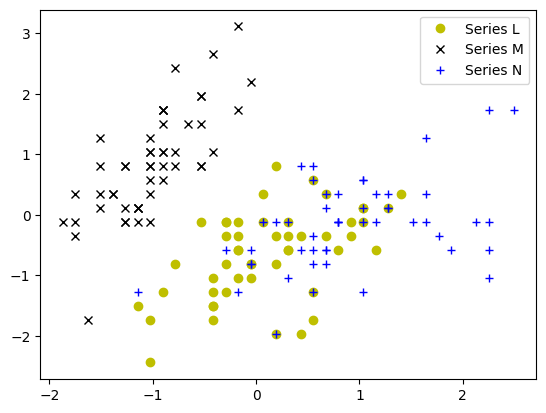

In [196]:
import matplotlib.pyplot as plt

def plotdata(X, y):
    class_labels = {0: 'Series L', 1: 'Series M', 2: 'Series N'}  # Mapping class labels to their corresponding names
    markers = {0: 'yo', 1: 'kx', 2: 'b+'}  # Mapping class labels to marker styles/colors
    
    for label in set(y):
        indices = y == label
        plt.plot(X[indices, 0], X[indices, 1], markers[label], label=class_labels[label])

    plt.legend()
    plt.show()


plotdata(X_scaled, y)


In [197]:

SVM= SVM()


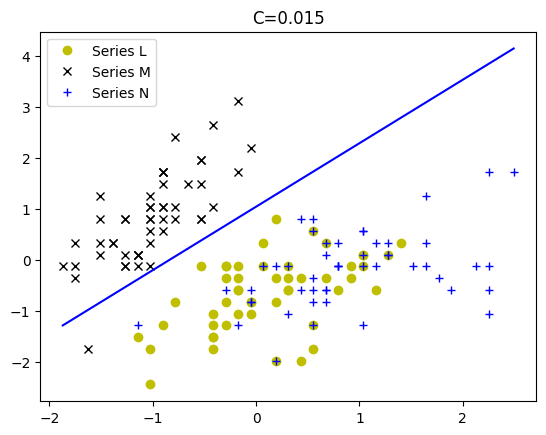

In [198]:
# C = 1
# classes = np.unique(y)
# plt.figure(figsize=(20,5))
# for i,c in enumerate(classes):
#     y_binary = np.where(y == c,1,-1)
#     model = SVM.svmTrain(X_scaled, y_binary, C,SVM.linearKernel)
#     # print(model['w'])
#     plt.subplot(1,3,i+1)
#     SVM.visualizeBoundaryLinear(X_scaled, y, model,'C={}'.format(C))

C = 0.015
y_binary = np.where(y == 1, 1, -1)

model = SVM.svmTrain(X_scaled, y_binary, C, SVM.linearKernel)
SVM.visualizeBoundaryLinear(X_scaled, y, model, 'C={}'.format(C))
    
plt.show()

0.6666666666666666
0.9866666666666667
0.9933333333333333
0.9933333333333333
0.9933333333333333
0.9933333333333333
Best Accuracy Comes out to be : 0.9933333333333333  For Class M vs Others at best_C value of  0.1


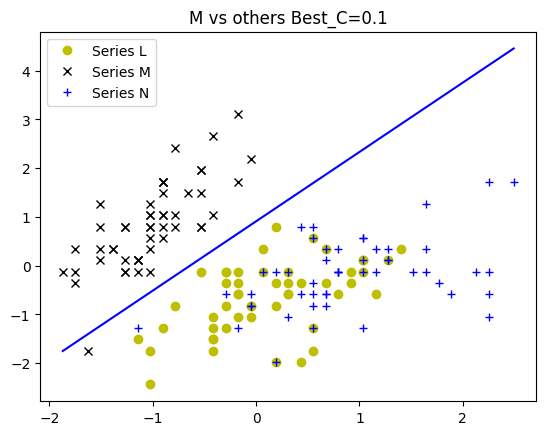

In [199]:
from sklearn.metrics import accuracy_score
# cals = [0.001,0.1,0.01]
cals = [0.001,0.01,0.1,0.12,0.14,0.2]

y_binary = np.where(y == 1, 1, -1)

np.random.seed(2000)
best_c = 0
best_model = None
best_accuracy = 0
best_accuracy_M = []
# plt.figure(figsize=(15,4))
for i,c in enumerate(cals):
    model = SVM.svmTrain(X_scaled, y_binary, c,SVM.linearKernel)
    # plt.subplot(1,3,i+1)
    # SVM.visualizeBoundaryLinear(X_scaled, y, model,'C={}'.format(c))
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)
    best_accuracy_M.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_c = c

print("Best Accuracy Comes out to be :",best_accuracy, " For Class M vs Others at best_C value of ",best_c)
SVM.visualizeBoundaryLinear(X_scaled,y,best_model,'M vs others Best_C={}'.format(best_c))
plt.show()

0.6666666666666666
0.6666666666666666
0.7333333333333333
0.7266666666666667
0.7333333333333333
0.74
Best Accuracy Comes out to be : 0.74  For Class L vs Others at best_C value of  0.2


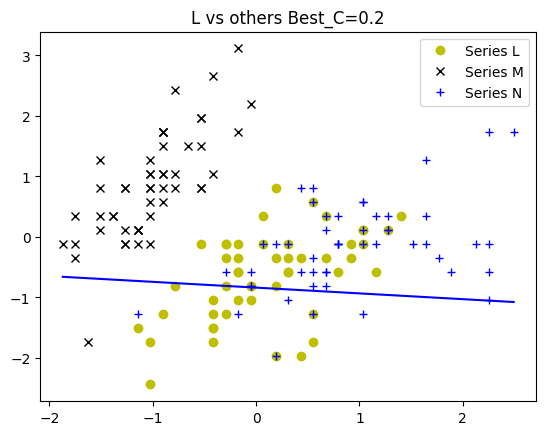

In [200]:
from sklearn.metrics import accuracy_score
cals = [0.001,0.01,0.1,0.12,0.14,0.2]
y_binary = np.where(y == 0, 1, -1)

np.random.seed(2000)
best_c = 0
best_model = None
best_accuracy_L = []
best_accuracy = 0
# plt.figure(figsize=(15,8))
for i,c in enumerate(cals):
    model = SVM.svmTrain(X_scaled, y_binary, c,SVM.linearKernel)
    # plt.subplot(2,3,i+1)
    # SVM.visualizeBoundaryLinear(X_scaled, y, model,'C={}'.format(c))
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)
    best_accuracy_L.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_c = c

print("Best Accuracy Comes out to be :",best_accuracy, " For Class L vs Others at best_C value of ",best_c)
SVM.visualizeBoundaryLinear(X_scaled,y,best_model,'L vs others Best_C={}'.format(best_c))
plt.show()

0.6666666666666666
0.6733333333333333
0.8
0.78
0.82
0.7933333333333333
Best Accuracy Comes out to be : 0.82  For Class N vs Others at best_C value of  0.14


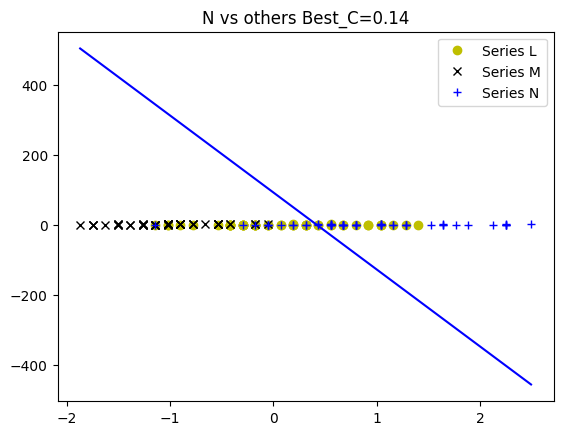

In [201]:
from sklearn.metrics import accuracy_score
cals = [0.001,0.01,0.1,0.12,0.14,0.2]
y_binary = np.where(y == 2, 1, -1)

np.random.seed(100)
best_c = 0
best_model = None
best_accuracy_N = []
best_accuracy = 0
# plt.figure(figsize=(15,8))
for i,c in enumerate(cals):
    model = SVM.svmTrain(X_scaled, y_binary, c,SVM.linearKernel)
    # plt.subplot(2,3,i+1)
    # SVM.visualizeBoundaryLinear(X_scaled, y, model,'C={}'.format(c))
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)
    best_accuracy_N.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy= accuracy
        best_model = model
        best_c = c

print("Best Accuracy Comes out to be :",best_accuracy, " For Class N vs Others at best_C value of ",best_c)
SVM.visualizeBoundaryLinear(X_scaled,y,best_model,'N vs others Best_C={}'.format(best_c))
plt.show()

Comparing Accuracies of Different Classes 

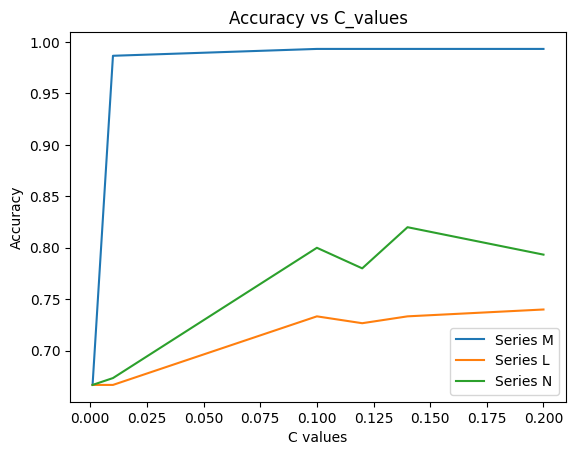

In [202]:
plt.plot(cals,best_accuracy_M,label='Series M')
plt.plot(cals,best_accuracy_L,label='Series L')
plt.plot(cals,best_accuracy_N,label='Series N')
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C_values")
plt.legend()
plt.show()

In [203]:
def gaussianKernel(x1, x2, sigma):
    sim = np.exp(-1 *((np.sum((x1-x2)**2))/(2*(sigma**2))))
    return sim

In [204]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
gaussianKernel(x1,x2,sigma)

0.32465246735834974

Making RBF Kernel

0.6666666666666666
0.6666666666666666
0.7933333333333333
0.8733333333333333
0.9266666666666666
1.0
1.0
1.0
1.0
1.0


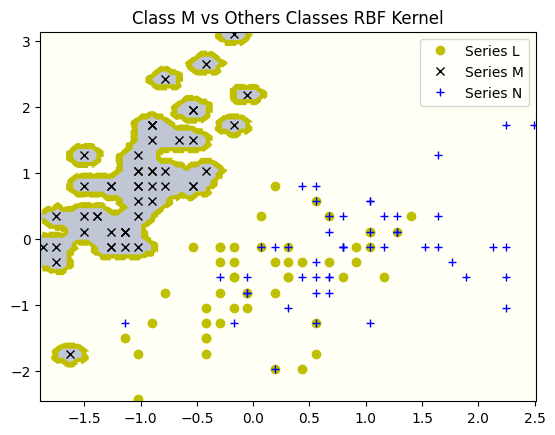

Best Accuracy Comes out to be : 1.0  For Class M vs Others at best_C value of  0.6
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [205]:
np.random.seed(100)
C = 0.3
cals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
sigma = 0.1
y_binary = np.where(y == 1, 1,-1)

best_accuracy = 0
best_accuracy_M = []
best_model = None
best_c = 0
best_preds = None
best_param_rbf_M = []

for i,c in enumerate(cals):
    model= SVM.svmTrain(X_scaled, y_binary, c, gaussianKernel, args=(sigma,))
    # SVM.visualizeBoundary(X_scaled, y, model)
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)

    best_accuracy_M.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy= accuracy
        best_model = model
        best_c = c
        best_preds = preds

SVM.visualizeBoundary(X_scaled, y, model)
plt.title("Class M vs Others Classes RBF Kernel")
plt.show()

print("Best Accuracy Comes out to be :",best_accuracy, " For Class M vs Others at best_C value of ",best_c)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_binary,best_preds, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

best_param_rbf_M.append(precision)
best_param_rbf_M.append(recall)
best_param_rbf_M.append(f1_score)


0.6666666666666666
0.6666666666666666
0.6666666666666666
0.7066666666666667
0.76
0.8133333333333334
0.9
0.9
0.9066666666666666
0.9266666666666666


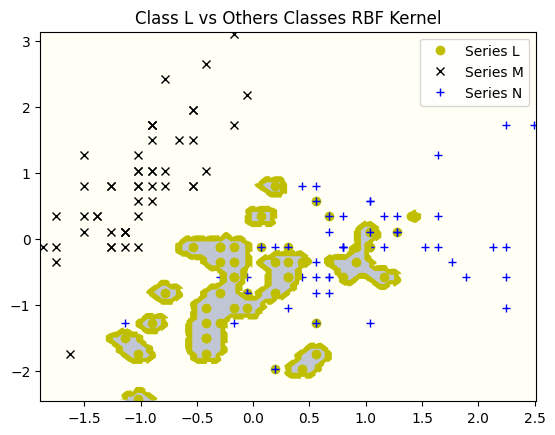

Best Accuracy Comes out to be : 0.9266666666666666  For Class L vs Others at best_C value of  1
Precision: 0.975609756097561
Recall: 0.8
F1-score: 0.8791208791208791


In [206]:
# C = 1
# sigma = 0.1
# y_binary = np.where(y == 0, 1,-1)
# model= SVM.svmTrain(X_scaled, y_binary, C, gaussianKernel, args=(sigma,))
# SVM.visualizeBoundary(X_scaled, y, model)
# preds = SVM.svmPredict(model,X_scaled)
# accuracy = accuracy_score(y_binary,preds)
# print(accuracy)

np.random.seed(100)
C = 0.3
cals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
sigma = 0.1
y_binary = np.where(y == 0, 1,-1)

best_accuracy = 0
best_accuracy_L = []
best_model = None
best_c = 0
best_preds = None
best_param_rbf_L = []

for i,c in enumerate(cals):
    model= SVM.svmTrain(X_scaled, y_binary, c, gaussianKernel, args=(sigma,))
    # SVM.visualizeBoundary(X_scaled, y, model)
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)

    best_accuracy_L.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy= accuracy
        best_model = model
        best_c = c
        best_preds = preds

SVM.visualizeBoundary(X_scaled, y, model)
plt.title("Class L vs Others Classes RBF Kernel")
plt.show()

print("Best Accuracy Comes out to be :",best_accuracy, " For Class L vs Others at best_C value of ",best_c)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_binary,best_preds, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

best_param_rbf_L.append(precision)
best_param_rbf_L.append(recall)
best_param_rbf_L.append(f1_score)

0.6666666666666666
0.6666666666666666
0.6666666666666666
0.72
0.78
0.7866666666666666
0.9
0.9
0.9
0.9066666666666666


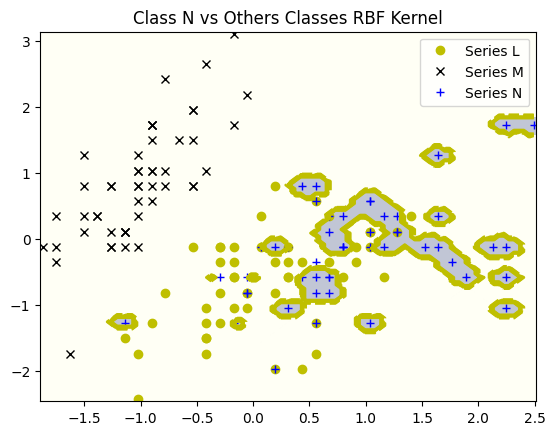

Best Accuracy Comes out to be : 0.9066666666666666  For Class N vs Others at best_C value of  1
Precision: 0.95
Recall: 0.76
F1-score: 0.8444444444444444


In [207]:
# C = 1
# sigma = 0.1
# y_binary = np.where(y == 2, 1,-1)
# model= SVM.svmTrain(X_scaled, y_binary, C, gaussianKernel, args=(sigma,))
# SVM.visualizeBoundary(X_scaled, y, model)
# preds = SVM.svmPredict(model,X_scaled)
# accuracy = accuracy_score(y_binary,preds)
# print(accuracy)

np.random.seed(100)
C = 0.3
cals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
sigma = 0.1
y_binary = np.where(y == 2, 1,-1)

best_accuracy = 0
best_accuracy_N = []
best_model = None
best_c = 0
best_preds = None
best_param_rbf_N = []

for i,c in enumerate(cals):
    model= SVM.svmTrain(X_scaled, y_binary, c, gaussianKernel, args=(sigma,))
    # SVM.visualizeBoundary(X_scaled, y, model)
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)

    best_accuracy_N.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy= accuracy
        best_model = model
        best_c = c
        best_preds = preds

SVM.visualizeBoundary(X_scaled, y, model)
plt.title("Class N vs Others Classes RBF Kernel")
plt.show()

print("Best Accuracy Comes out to be :",best_accuracy, " For Class N vs Others at best_C value of ",best_c)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_binary,best_preds, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

best_param_rbf_N.append(precision)
best_param_rbf_N.append(recall)
best_param_rbf_N.append(f1_score)

In [208]:
# C = 1
# sigma = 0.1
# y_binary = np.where(y == 0, 1,-1)
# model= SVM.svmTrain(X_scaled, y_binary, C, gaussianKernel, args=(sigma,))
# SVM.visualizeBoundary(X_scaled, y, model)
# preds = SVM.svmPredict(model,X_scaled)
# accuracy = accuracy_score(y_binary,preds)
# print(accuracy)

Comparing Accuracies of Different Classes for Different C values For RBF Kernel

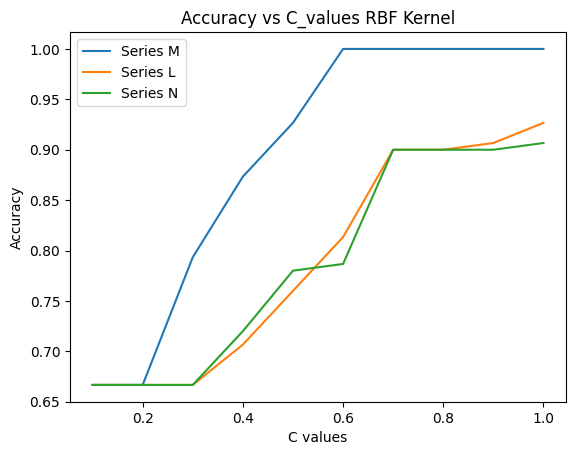

In [209]:
plt.plot(cals,best_accuracy_M,label='Series M')
plt.plot(cals,best_accuracy_L,label='Series L')
plt.plot(cals,best_accuracy_N,label='Series N')
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C_values RBF Kernel")
plt.legend()
plt.show()

In [210]:
def find_best_c_sigma(X, y):

    C_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    error = 9999

    C = 0.01
    sigma = 0.01
    for c in C_vals:
        for i,s in enumerate(sigma_vals):
            model= SVM.svmTrain(X, y, c, gaussianKernel, args=(s,))
            y_pred = SVM.svmPredict(model,X)
            error_mean = np.mean(y_pred != y)
            if error_mean < error:
                C = c
                sigma = s
                error = error_mean
    return C, sigma

In [211]:
y_binary = np.where(y == 2,1,-1)
C, sigma = find_best_c_sigma(X_scaled, y_binary)


In [212]:
print(C)
print(sigma)

1
0.01


POLYNOMIAL KERNEL

0.9866666666666667
0.9866666666666667
0.98
0.9866666666666667
0.9733333333333334
0.9866666666666667
0.9866666666666667
0.9866666666666667
0.9733333333333334
0.9666666666666667


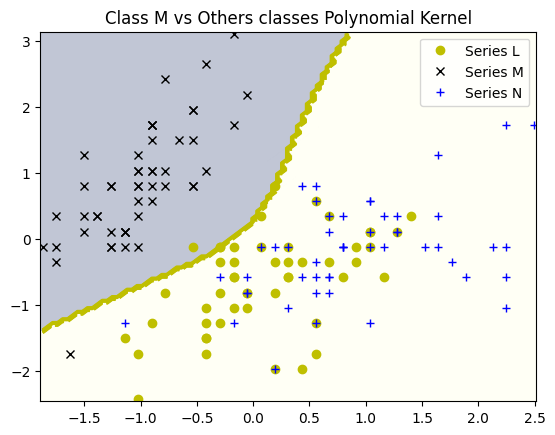

Best Accuracy Comes out to be : 0.9866666666666667  For Class M vs Others at best_C value of  0.1
Precision: 0.98
Recall: 0.98
F1-score: 0.98


In [213]:
np.random.seed(4)
cals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
degree = 3
y_binary = np.where(y == 1, 1,-1)

best_accuracy = 0
best_accuracy_M_poly = []
best_model = None
best_c = 0
best_preds = None
best_param_poly_M = []

# plt.figure(figsize = (20,10))
for i,c in enumerate(cals):
    model= SVM.svmTrain(X_scaled, y_binary, c, SVM.polynomialKernel, args=(degree,))
    # plt.subplot(2,5,i+1)
    # SVM.visualizeBoundary(X_scaled, y, model)
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)

    best_accuracy_M_poly.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy= accuracy
        best_model = model
        best_c = c
        best_preds = preds

SVM.visualizeBoundary(X_scaled, y, model)
plt.title("Class M vs Others classes Polynomial Kernel")
plt.show()

print("Best Accuracy Comes out to be :",best_accuracy, " For Class M vs Others at best_C value of ",best_c)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_binary,best_preds, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

best_param_poly_M.append(precision)
best_param_poly_M.append(recall)
best_param_poly_M.append(f1_score)

0.76
0.76
0.7666666666666667
0.7733333333333333
0.7666666666666667
0.7733333333333333
0.7666666666666667
0.78
0.7733333333333333
0.78


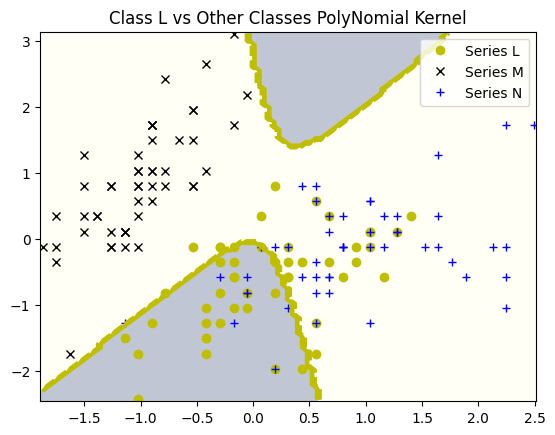

Best Accuracy Comes out to be : 0.78  For Class L vs Others at best_C value of  0.8
Precision: 0.7428571428571429
Recall: 0.52
F1-score: 0.6117647058823529


In [214]:
# C = 0.2
# degree = 3
# y_binary = np.where(y == 1, 1,-1)
# model= SVM.svmTrain(X_scaled, y_binary, C, SVM.polynomialKernel, args=(degree,))
# SVM.visualizeBoundary(X_scaled, y, model)
# preds = SVM.svmPredict(model,X_scaled)
# accuracy = accuracy_score(y_binary,preds)
# print(accuracy)

# np.random.seed(100)
# C = 0.3
np.random.seed(7891)
cals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
degree = 3
y_binary = np.where(y == 0, 1,-1)

best_accuracy = 0
best_accuracy_L_poly = []
best_model = None
best_c = 0
best_preds = None
best_param_poly_L = []

# plt.figure(figsize = (20,10))
for i,c in enumerate(cals):
    model= SVM.svmTrain(X_scaled, y_binary, c, SVM.polynomialKernel, args=(degree,))
    # plt.subplot(2,5,i+1)
    # SVM.visualizeBoundary(X_scaled, y, model)
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)

    best_accuracy_L_poly.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy= accuracy
        best_model = model
        best_c = c
        best_preds = preds

SVM.visualizeBoundary(X_scaled, y, model)
plt.title("Class L vs Other Classes PolyNomial Kernel")
plt.show()

print("Best Accuracy Comes out to be :",best_accuracy, " For Class L vs Others at best_C value of ",best_c)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_binary,best_preds, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

best_param_poly_L.append(precision)
best_param_poly_L.append(recall)
best_param_poly_L.append(f1_score)

0.8066666666666666
0.78
0.7533333333333333
0.7733333333333333
0.7466666666666667
0.7466666666666667
0.7466666666666667
0.74
0.72
0.74


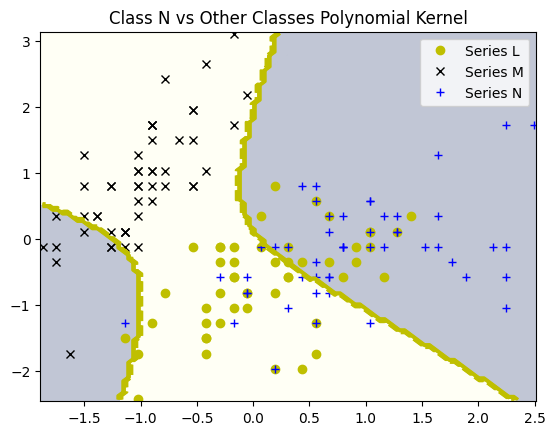

Best Accuracy Comes out to be : 0.8066666666666666  For Class N vs Others at best_C value of  0.1
Precision: 0.7333333333333333
Recall: 0.66
F1-score: 0.6947368421052631


In [215]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# You have already calculated accuracy, let's assume it's stored in a variable called 'accuracy'

# Calculate precision, recall, and F1-score


np.random.seed(2361)
cals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
degree = 3
y_binary = np.where(y == 2, 1,-1)

best_accuracy = 0
best_accuracy_N_poly = []
best_model = None
best_c = 0
best_preds = preds
best_param_poly_N = []

# plt.figure(figsize = (20,10))
for i,c in enumerate(cals):
    model= SVM.svmTrain(X_scaled, y_binary, c, SVM.polynomialKernel, args=(degree,))
    # plt.subplot(2,5,i+1)
    # SVM.visualizeBoundary(X_scaled, y, model)
    preds = SVM.svmPredict(model,X_scaled)
    accuracy = accuracy_score(y_binary,preds)
    print(accuracy)   
    
    best_accuracy_N_poly.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy= accuracy
        best_model = model
        best_c = c
        best_preds = preds


SVM.visualizeBoundary(X_scaled, y, model)
plt.title("Class N vs Other Classes Polynomial Kernel")
plt.show()

print("Best Accuracy Comes out to be :",best_accuracy, " For Class N vs Others at best_C value of ",best_c)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_binary,best_preds, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

best_param_poly_N.append(precision)
best_param_poly_N.append(recall)
best_param_poly_N.append(f1_score)

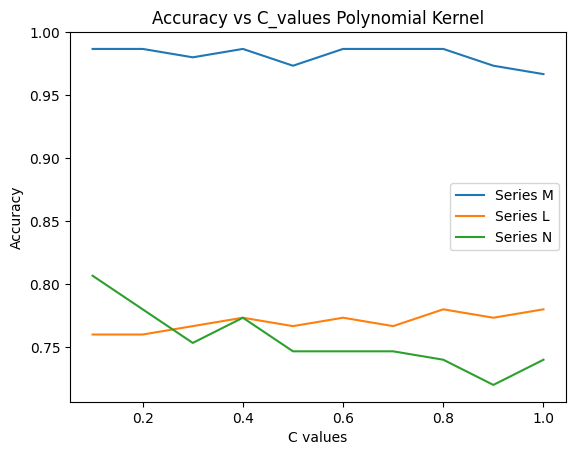

In [216]:
plt.plot(cals,best_accuracy_M_poly,label='Series M')
plt.plot(cals,best_accuracy_L_poly,label='Series L')
plt.plot(cals,best_accuracy_N_poly,label='Series N')
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C_values Polynomial Kernel")
plt.legend()
plt.show()

Plotting Precision , Recall , F1_score Graphs for Polynomial Kernel vs RBF kernel

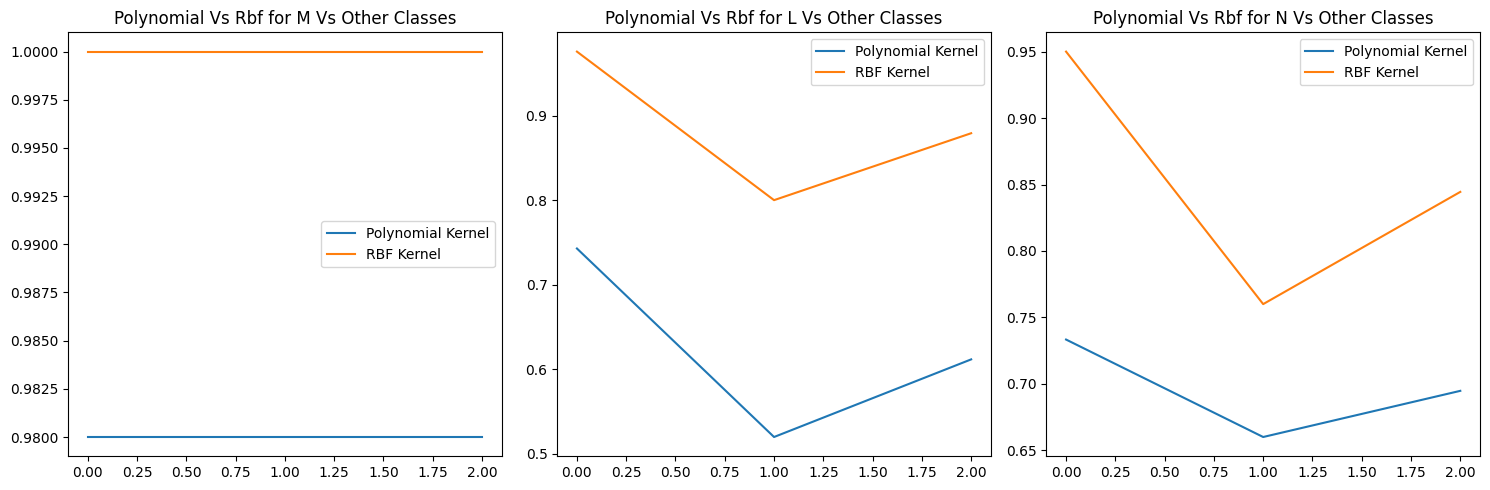

In [218]:
plt.figure(figsize=(15, 5))

# Plot first subplot
plt.subplot(1, 3, 1)
plt.plot(best_param_poly_M, label='Polynomial Kernel')
plt.plot(best_param_rbf_M, label='RBF Kernel')
plt.legend()
plt.title('Polynomial Vs Rbf for M Vs Other Classes')

# Plot second subplot
plt.subplot(1, 3, 2)
plt.plot(best_param_poly_L, label='Polynomial Kernel')
plt.plot(best_param_rbf_L, label='RBF Kernel')
plt.legend()
plt.title('Polynomial Vs Rbf for L Vs Other Classes')

# Plot third subplot
plt.subplot(1, 3, 3)
plt.plot(best_param_poly_N, label='Polynomial Kernel')
plt.plot(best_param_rbf_N, label='RBF Kernel')
plt.legend()
plt.title('Polynomial Vs Rbf for N Vs Other Classes')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

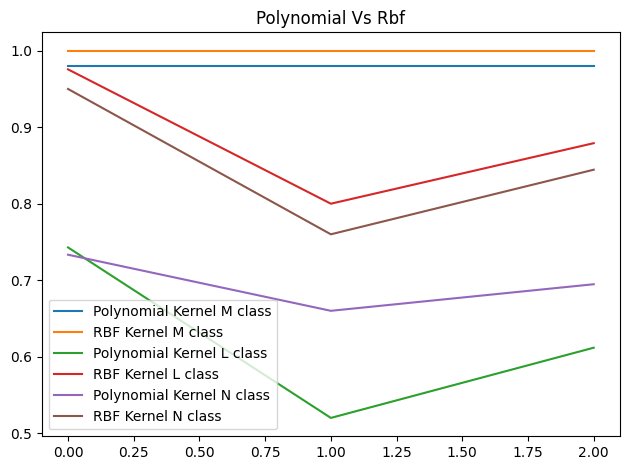

In [220]:
plt.plot(best_param_poly_M, label='Polynomial Kernel M class')
plt.plot(best_param_rbf_M, label='RBF Kernel M class')

plt.plot(best_param_poly_L, label='Polynomial Kernel L class')
plt.plot(best_param_rbf_L, label='RBF Kernel L class')

plt.plot(best_param_poly_N, label='Polynomial Kernel N class')
plt.plot(best_param_rbf_N, label='RBF Kernel N class')

plt.legend()
plt.title('Polynomial Vs Rbf')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()